In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data\MadhyaPradesh.csv', encoding='ISO-8859-1',low_memory=False)

df

CORPORATE_IDENTIFICATION_NUMBER  \
0               L00153MP1990PLC006090   
1               L01111MP2017PLC044596   
2               L01122MP1995PLC009280   
3               L01222MP1984PLC002627   
4               L01710MP1989PLC005502   
...                               ...   
46183           U99999MP1994PTC033500   
46184           U99999MP1995OPC024931   
46185           U99999MP1995PLC022647   
46186           U99999MP2005PLC052837   
46187           U99999MP9076PTC326481   

                                   Company_Name             Company_status  \
0                       NATRAJ PROTEINS LIMITED                     Active   
1        SHREEOSWAL SEEDS AND CHEMICALS LIMITED                     Active   
2                      RASHEL AGRO TECH LIMITED                     Active   
3                          SIMRAN FARMS LIMITED                     Active   
4                      CHHABRA SPINNERS LIMITED                     Active   
...                                         ...                        ...   
46183      SHREE JALARAM METALS PRIVATE LIMITED                     Active   
46184    DEVENDRA FINLEASE PRIVATE LIMITED(OPC)                     Active   
46185                    PANAJI FINANCE LIMITED                     Active   
46186  ESSAR POWER TRANSMISSION COMPANY LIMITED                     Active   
46187             958U INFOTECH PRIVATE LIMITED  Not Available for eFiling   

                     Company_class           Company_Category  \
0                           Public  Company limited by Shares   
1                           Public  Company limited by Shares   
2                           Public  Company limited by Shares   
3                           Public  Company limited by Shares   
4                           Public  Company limited by Shares   
...                            ...                        ...   
46183                      Private  Company limited by Shares   
46184  Private(One Person Company)  Company limited by Shares   
46185                       Public  Company limited by Shares   
46186                       Public  Company limited by Shares   
46187                      Private  Company limited by Shares   

      Company_sub_category DATE_OF_REGISTRATION REGISTERED_STATE  \
0         Non-govt company             21-11-90   Madhya Pradesh   
1         Non-govt company             01-12-17   Madhya Pradesh   
2         Non-govt company             05-04-95   Madhya Pradesh   
3         Non-govt company             26-10-84   Madhya Pradesh   
4         Non-govt company             20-09-89   Madhya Pradesh   
...                    ...                  ...              ...   
46183     Non-govt company             11-08-94   Madhya Pradesh   
46184     Non-govt company             04-04-95   Madhya Pradesh   
46185     Non-govt company             11-10-95   Madhya Pradesh   
46186     Non-govt company             07-12-05   Madhya Pradesh   
46187     Non-govt company             29-08-76   Madhya Pradesh   

       AUTHORIZED_CAP  PAIDUP_CAPITAL  Industrial_Class  \
0        5.000000e+07    3.747000e+07               153   
1        1.800000e+08    1.524500e+08              1111   
2        1.000000e+08    9.584500e+07              1122   
3        6.000000e+07    3.791700e+07              1222   
4        7.500000e+07    5.309100e+07              1710   
...               ...             ...               ...   
46183    5.000000e+07    2.250325e+07             99999   
46184    1.000000e+06    9.000000e+05             99999   
46185    2.000000e+07    2.000000e+07             99999   
46186    2.000000e+10    5.970360e+09             99999   
46187    1.020000e+05    0.000000e+00             99999   

                  PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN  \
0                                           Unclassified   
1      Agriculture, hunting and related service activ...   
2      Agriculture, hunting and related service activ...   
3      Agriculture, hunting a

In [3]:
# Assuming df is your DataFrame

# Filter out rows with unknown or invalid values in 'DATE_OF_REGISTRATION'
df = df[pd.to_datetime(df['DATE_OF_REGISTRATION'], errors='coerce', dayfirst=True).notna()]

# Convert 'DATE_OF_REGISTRATION' to datetime format
df['DATE_OF_REGISTRATION'] = pd.to_datetime(df['DATE_OF_REGISTRATION'], errors='coerce', dayfirst=True)

# Extract year from the registration date
df['Registration_Year'] = df['DATE_OF_REGISTRATION'].dt.year

In [4]:
# Check for missing values
df.isnull().sum()

CORPORATE_IDENTIFICATION_NUMBER               0
Company_Name                                  0
Company_status                                0
Company_class                                17
Company_Category                             17
Company_sub_category                         17
DATE_OF_REGISTRATION                          0
REGISTERED_STATE                              0
AUTHORIZED_CAP                                0
PAIDUP_CAPITAL                                0
Industrial_Class                              0
PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN        0
Registered_Office_Address                     0
REGISTRAR_OF_COMPANIES                        0
EMAIL_ADDR                                 8027
Latest_Year_AR                            20343
Latest_Year_BS                            20358
Registration_Year                             0
dtype: int64

In [5]:
df=df.drop(['DATE_OF_REGISTRATION','EMAIL_ADDR'],axis=1)
df

CORPORATE_IDENTIFICATION_NUMBER  \
0               L00153MP1990PLC006090   
1               L01111MP2017PLC044596   
2               L01122MP1995PLC009280   
3               L01222MP1984PLC002627   
4               L01710MP1989PLC005502   
...                               ...   
46183           U99999MP1994PTC033500   
46184           U99999MP1995OPC024931   
46185           U99999MP1995PLC022647   
46186           U99999MP2005PLC052837   
46187           U99999MP9076PTC326481   

                                   Company_Name             Company_status  \
0                       NATRAJ PROTEINS LIMITED                     Active   
1        SHREEOSWAL SEEDS AND CHEMICALS LIMITED                     Active   
2                      RASHEL AGRO TECH LIMITED                     Active   
3                          SIMRAN FARMS LIMITED                     Active   
4                      CHHABRA SPINNERS LIMITED                     Active   
...                                         ...                        ...   
46183      SHREE JALARAM METALS PRIVATE LIMITED                     Active   
46184    DEVENDRA FINLEASE PRIVATE LIMITED(OPC)                     Active   
46185                    PANAJI FINANCE LIMITED                     Active   
46186  ESSAR POWER TRANSMISSION COMPANY LIMITED                     Active   
46187             958U INFOTECH PRIVATE LIMITED  Not Available for eFiling   

                     Company_class           Company_Category  \
0                           Public  Company limited by Shares   
1                           Public  Company limited by Shares   
2                           Public  Company limited by Shares   
3                           Public  Company limited by Shares   
4                           Public  Company limited by Shares   
...                            ...                        ...   
46183                      Private  Company limited by Shares   
46184  Private(One Person Company)  Company limited by Shares   
46185                       Public  Company limited by Shares   
46186                       Public  Company limited by Shares   
46187                      Private  Company limited by Shares   

      Company_sub_category REGISTERED_STATE  AUTHORIZED_CAP  PAIDUP_CAPITAL  \
0         Non-govt company   Madhya Pradesh    5.000000e+07    3.747000e+07   
1         Non-govt company   Madhya Pradesh    1.800000e+08    1.524500e+08   
2         Non-govt company   Madhya Pradesh    1.000000e+08    9.584500e+07   
3         Non-govt company   Madhya Pradesh    6.000000e+07    3.791700e+07   
4         Non-govt company   Madhya Pradesh    7.500000e+07    5.309100e+07   
...                    ...              ...             ...             ...   
46183     Non-govt company   Madhya Pradesh    5.000000e+07    2.250325e+07   
46184     Non-govt company   Madhya Pradesh    1.000000e+06    9.000000e+05   
46185     Non-govt company   Madhya Pradesh    2.000000e+07    2.000000e+07   
46186     Non-govt company   Madhya Pradesh    2.000000e+10    5.970360e+09   
46187     Non-govt company   Madhya Pradesh    1.020000e+05    0.000000e+00   

       Industrial_Class             PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN  \
0                   153                                       Unclassified   
1                  1111  Agriculture, hunting and related service activ...   
2                  1122  Agriculture, hunting and related service activ...   
3                  1222  Agriculture, hunting and related service activ...   
4                  1710  Agriculture, hunting and related service activ...   
...                 ...                                                ...   
46183             99999          Extraterritorial organizations and bodies   
46184             99999          Extraterritorial organizations and bodies   
46185             99999          Extraterritorial organizations and bodies   
46186             99999          Extraterritorial organizations an

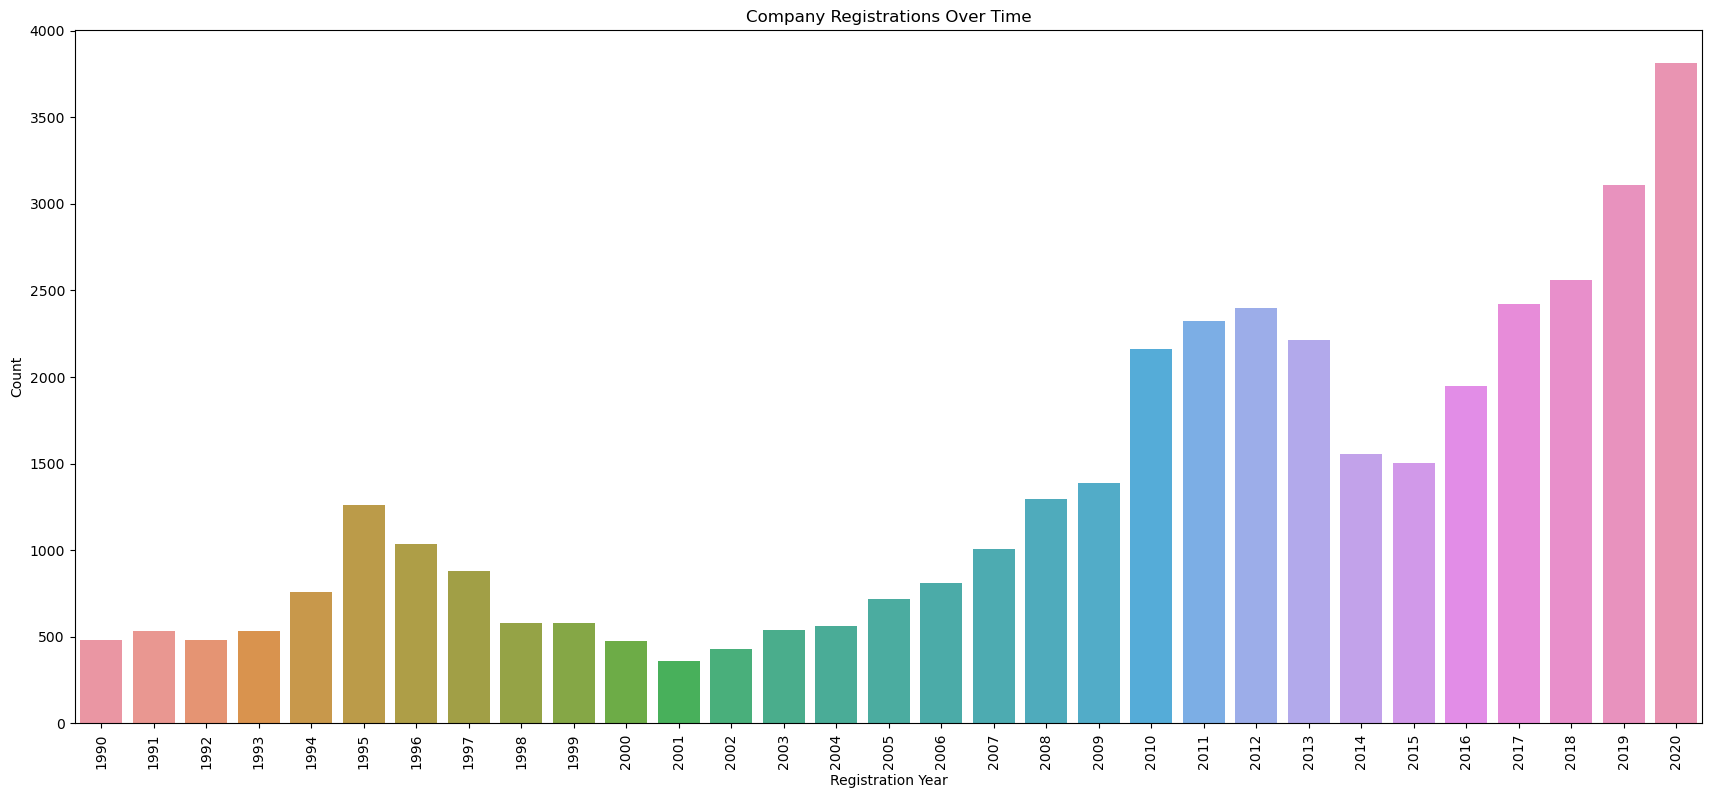

In [6]:
# EDA - Trends over time
plt.figure(figsize=(21, 9))
sns.countplot(x='Registration_Year', data=df[(df['Registration_Year']<=2020) & (df['Registration_Year']>=1990)])
plt.title('Company Registrations Over Time')
plt.xlabel('Registration Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

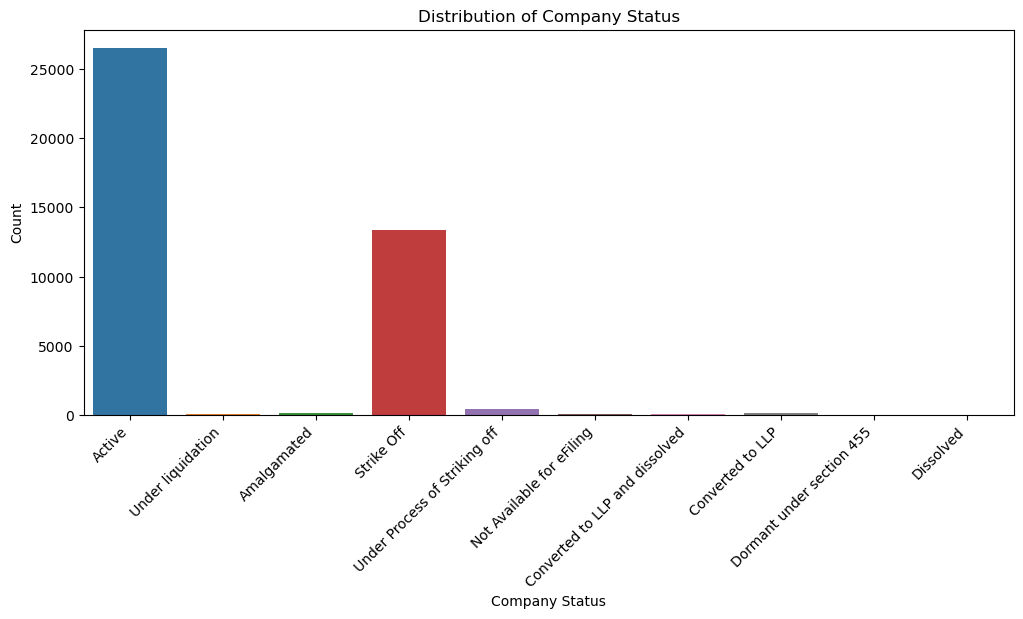

In [7]:
# EDA - Company Status
plt.figure(figsize=(12, 5))
sns.countplot(x='Company_status', data=df[(df['Registration_Year']<=2020) & (df['Registration_Year']>=1990)])
plt.title('Distribution of Company Status')
plt.xlabel('Company Status')
plt.ylabel('Count')
plt.xticks(rotation=45,ha='right')
plt.show()

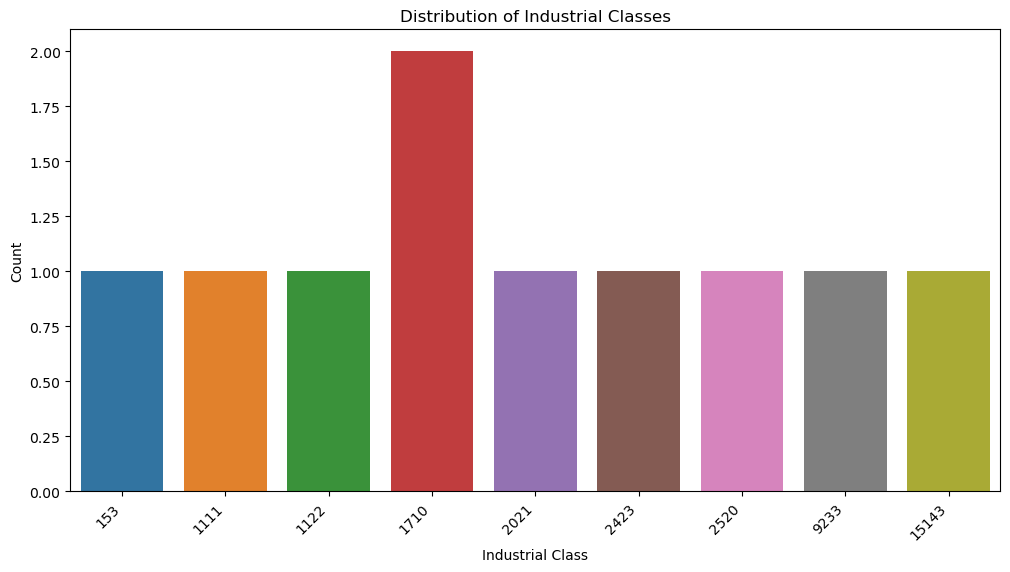

In [8]:
# EDA - Industrial Class Distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='Industrial_Class', data=df[(df['Registration_Year']<=2020) & (df['Registration_Year']>=1990)].head(10))
plt.title('Distribution of Industrial Classes')
plt.xlabel('Industrial Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

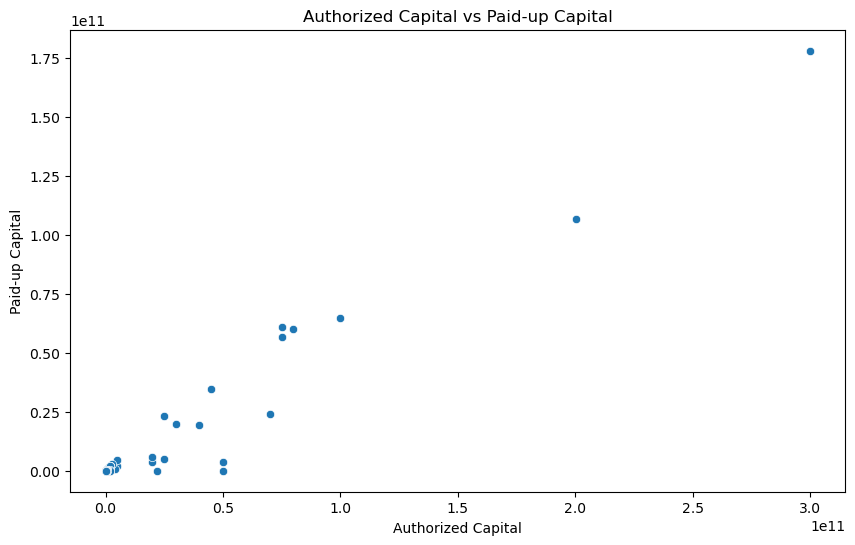

In [9]:
# EDA - Relationship between Authorized Capital and Paid-up Capital
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AUTHORIZED_CAP', y='PAIDUP_CAPITAL', data=df[(df['Registration_Year']<=2020) & (df['Registration_Year']>=1990)])
plt.title('Authorized Capital vs Paid-up Capital')
plt.xlabel('Authorized Capital')
plt.ylabel('Paid-up Capital')
plt.show()

In [10]:
# Print the unique values in the 'Company_Category' column
print(df['Company_Category'].unique())

['Company limited by Shares' nan 'Company Limited by Guarantee'
 'Unlimited Company']


In [11]:
import numpy as np
df['Company_Category'] =df['Company_Category'].replace(' ',np.nan)

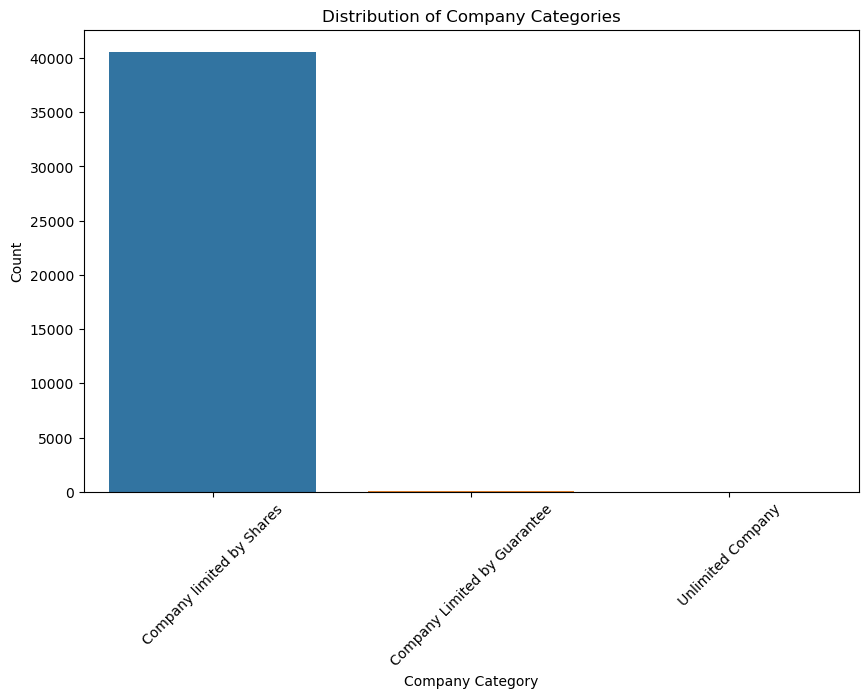

In [12]:
# EDA - Distribution of Company Categories
plt.figure(figsize=(10, 6))
sns.countplot(x='Company_Category', data=df[(df['Registration_Year']<=2020) & (df['Registration_Year']>=1990)])
plt.title('Distribution of Company Categories')
plt.xlabel('Company Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

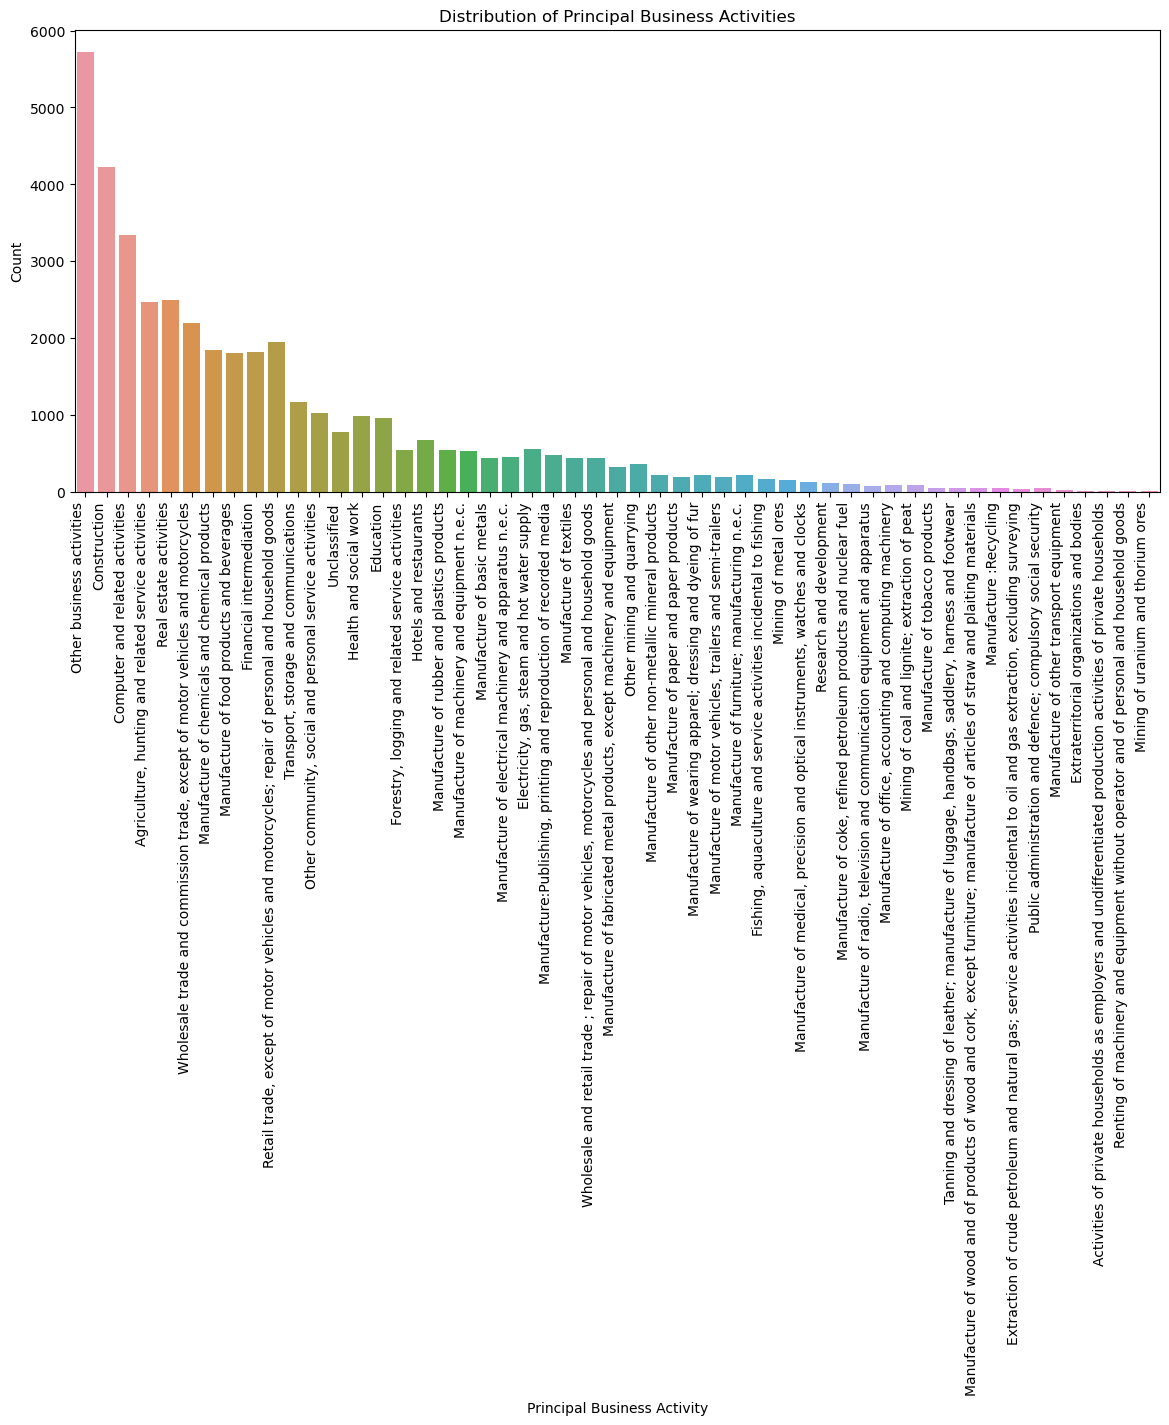

In [13]:
# EDA - Distribution of Principal Business Activities
plt.figure(figsize=(14, 6))
sns.countplot(x='PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN', data=df[(df['Registration_Year']<=2020) & (df['Registration_Year']>=1990)], order=df['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN'].value_counts().index)
plt.title('Distribution of Principal Business Activities')
plt.xlabel('Principal Business Activity')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.show()

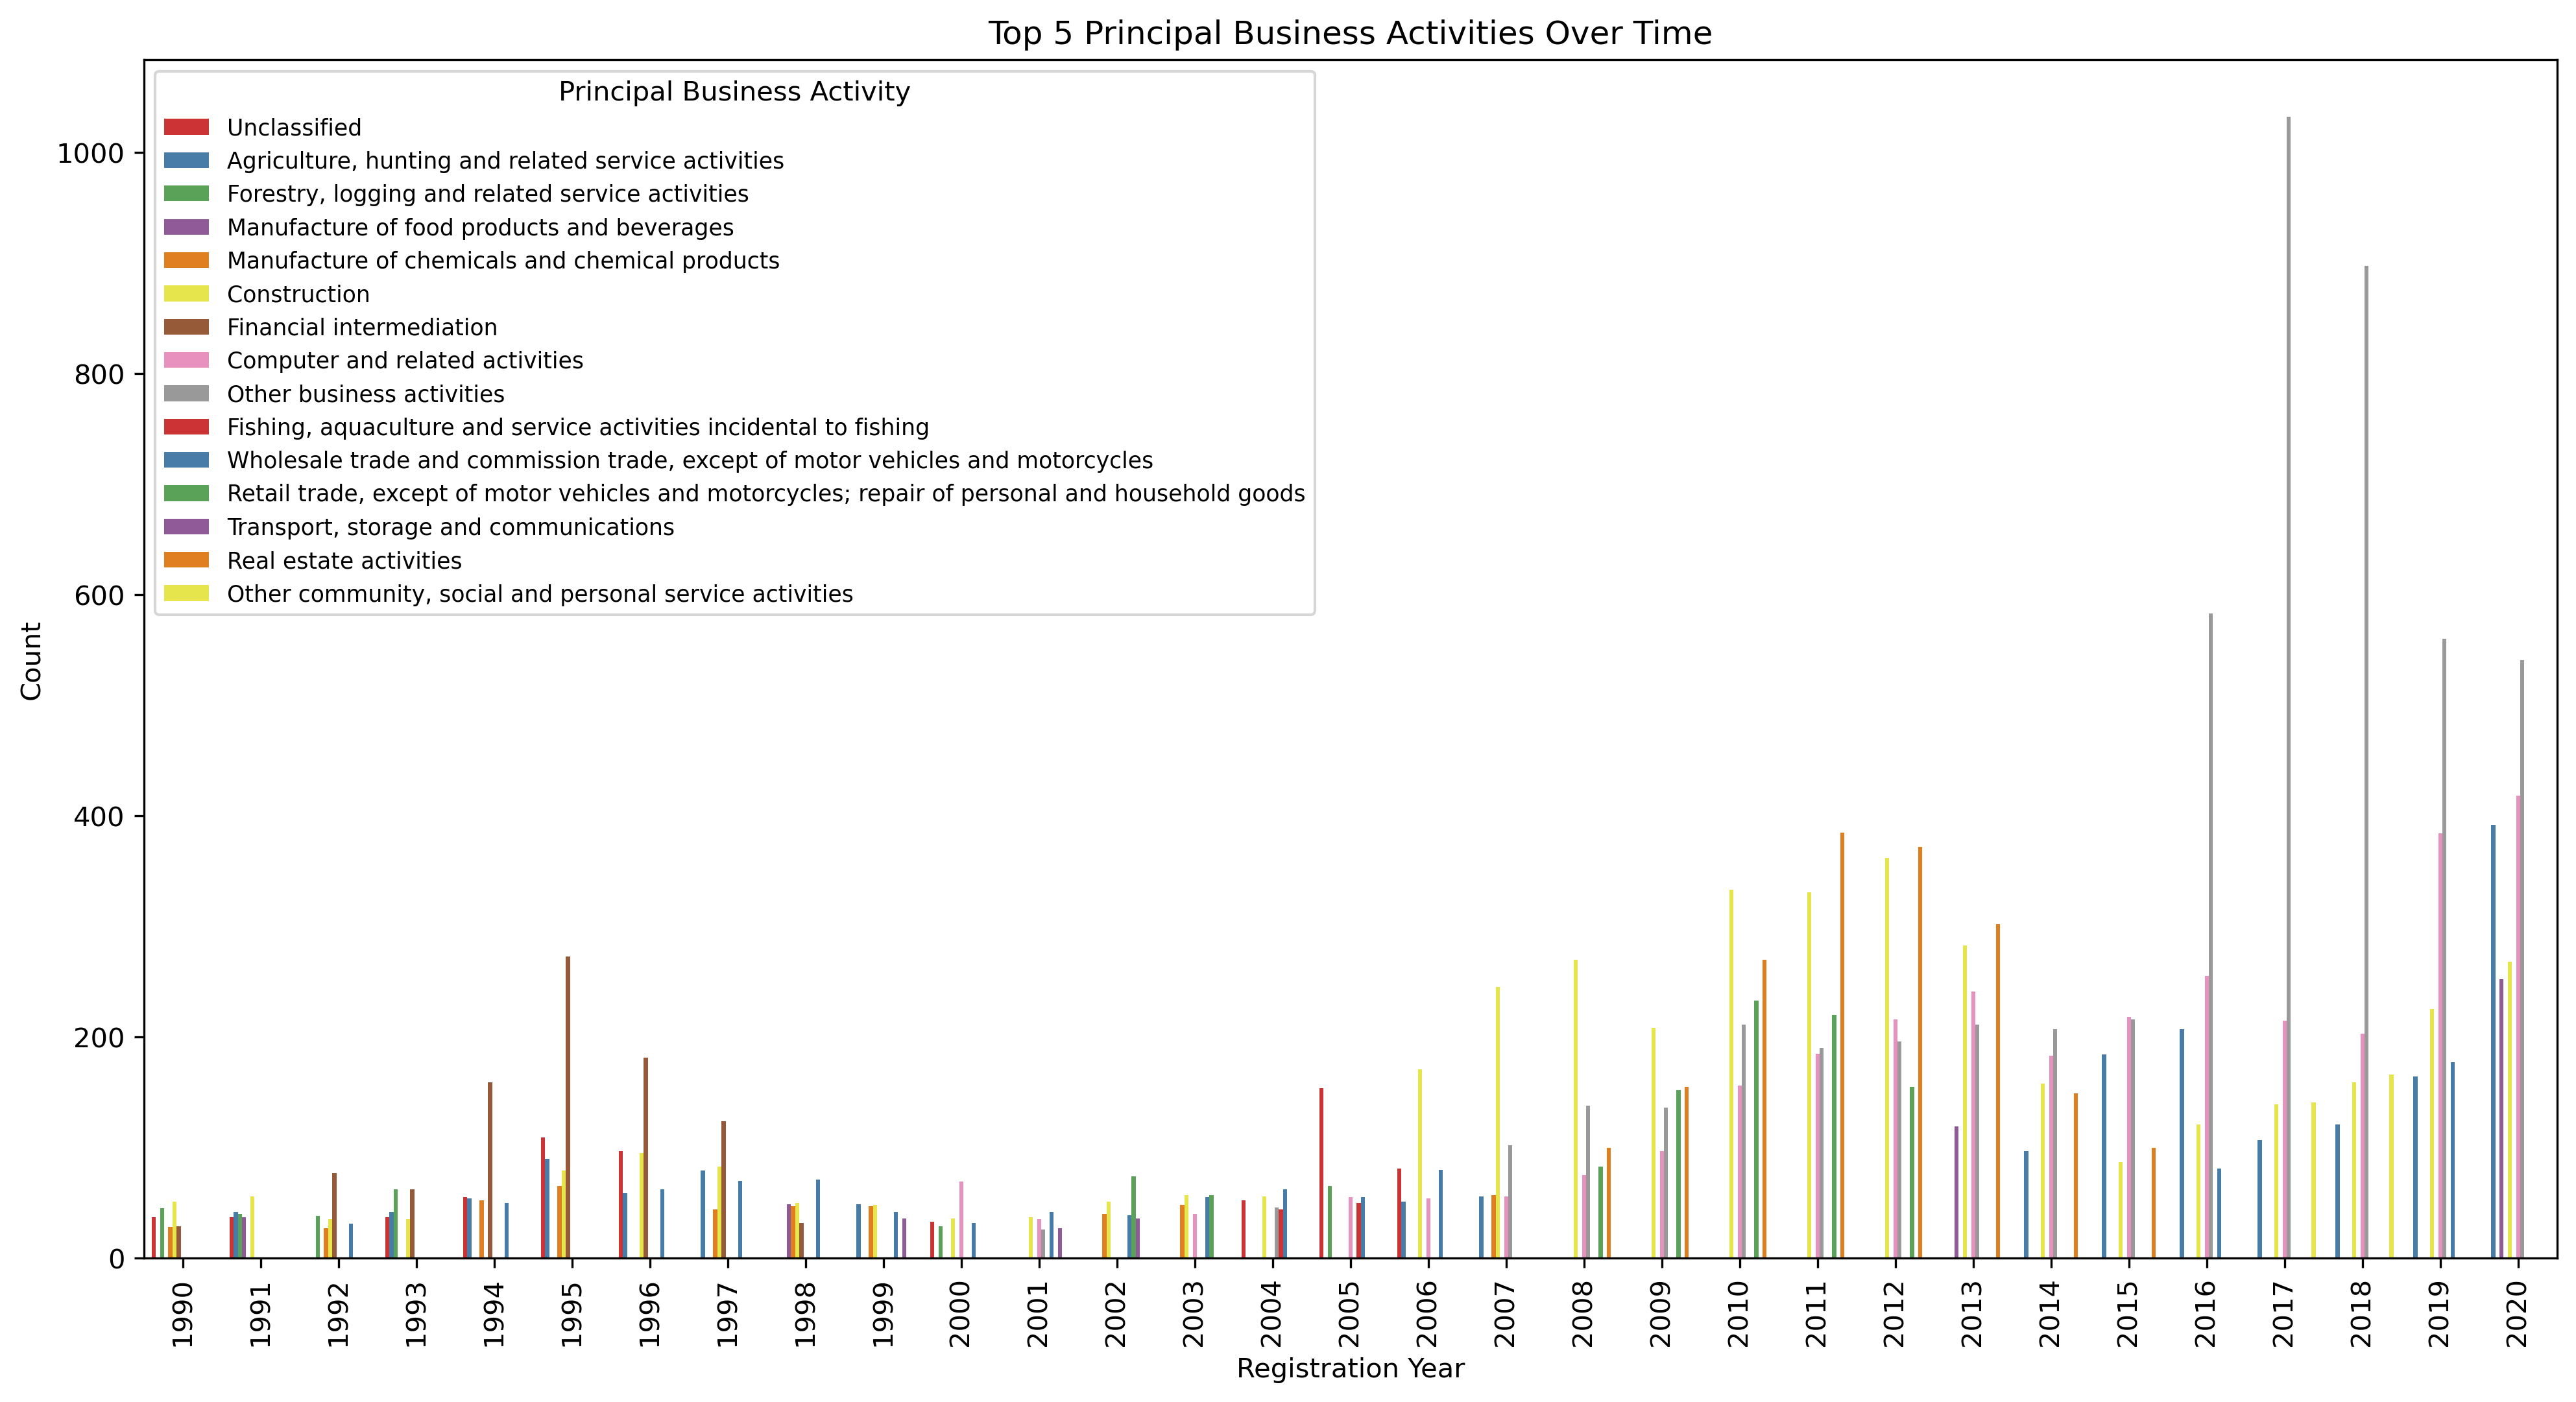

In [14]:
# Find the top 5 business activities for each year
top_activities = df.loc[(df['Registration_Year']>=1990) & (df['Registration_Year'] <= 2020)].groupby('Registration_Year')['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN'].apply(lambda x: x.value_counts().nlargest(5).index.tolist())

# Filter the dataframe to include only the top activities
df_top_activities = df[df.apply(lambda x: x['Registration_Year'] in top_activities.index and x['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN'] in top_activities.loc[x['Registration_Year']], axis=1)]

plt.figure(figsize=(16, 8),dpi=300)
sns.countplot(x='Registration_Year', hue='PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN', data=df_top_activities, palette='Set1')
plt.title('Top 5 Principal Business Activities Over Time')
plt.xlabel('Registration Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Principal Business Activity', fontsize='small')
plt.show()

In [15]:
# Filter companies registered between 2013 and 2020
filtered_df = df[(df['Registration_Year'] >= 2013) & (df['Registration_Year'] <= 2020)]

# Get the top 5 business activities
top_business_activities = filtered_df['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN'].value_counts().head(5)

# Print the result
print("Top 5 PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN from 2013 to 2020:")
print(top_business_activities)

Top 5 PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN from 2013 to 2020:
Other business activities                              4247
Computer and related activities                        2117
Construction                                           1440
Agriculture, hunting and related service activities    1388
Real estate activities                                  930
Name: PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN, dtype: int64


## Authorized capital

In [16]:
df.loc[:, 'AUTHORIZED_CAP'] = df['AUTHORIZED_CAP'].astype(float)
df.loc[:, 'PAIDUP_CAPITAL'] = df['PAIDUP_CAPITAL'].astype(float)
# Group by 'PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN' and calculate the mean of 'AUTHORIZED_CAP' and 'PAIDUP_CAPITAL'
grouped_df = df.groupby('PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN')[['AUTHORIZED_CAP', 'PAIDUP_CAPITAL']].mean().reset_index()

df = df.sort_values(by='Registration_Year')

# Calculate the percentage change in authorized capital for each activity over time
df['CAPITAL_CHANGE'] = df.groupby(['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN', 'Registration_Year'])['AUTHORIZED_CAP'].pct_change().fillna(0)

# Group by 'PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN' and calculate the mean of 'CAPITAL_CHANGE'
activity_trend_df = df.groupby(['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN','Registration_Year'])['CAPITAL_CHANGE'].mean().reset_index()

# Print the new DataFrame with the trend analysis
activity_trend_df2= activity_trend_df.interpolate()
activity_trend_df2


PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN  Registration_Year  \
0     Activities of private households as employers ...               1987   
1     Activities of private households as employers ...               1995   
2     Activities of private households as employers ...               1996   
3     Activities of private households as employers ...               2000   
4     Activities of private households as employers ...               2001   
...                                                 ...                ...   
2110  Wholesale trade and commission trade, except o...               2054   
2111  Wholesale trade and commission trade, except o...               2055   
2112  Wholesale trade and commission trade, except o...               2061   
2113  Wholesale trade and commission trade, except o...               2068   
2114  Wholesale trade and commission trade, except o...               2073   

      CAPITAL_CHANGE  
0               0.00  
1               0.00  
2               0.00  
3               0.00  
4               0.00  
...              ...  
2110           -0.49  
2111            0.00  
2112            0.00  
2113            0.00  
2114           -0.30  

[2115 rows x 3 columns]

## Comparison Score

In [17]:
# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Activity_1', 'Activity_2', 'Comparison'])

# Comparative Analysis: This compares the mean paid-up capital of all business activities.
# It helps in understanding their relative performance and market standing.
for i in range(len(grouped_df) - 1):
    for j in range(i + 1, len(grouped_df)):
        activity1_capital = grouped_df.loc[i, 'PAIDUP_CAPITAL']
        activity2_capital = grouped_df.loc[j, 'PAIDUP_CAPITAL']
        comparison = activity1_capital / activity2_capital
        new_row = pd.DataFrame({'Activity_1': [grouped_df.loc[i, 'PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN']],
                                'Activity_2': [grouped_df.loc[j, 'PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN']],
                                'Comparison': [comparison]})
        results_df = pd.concat([results_df, new_row], ignore_index=True)

# Print the results DataFrame
results_df


Activity_1  \
0     Activities of private households as employers ...   
1     Activities of private households as employers ...   
2     Activities of private households as employers ...   
3     Activities of private households as employers ...   
4     Activities of private households as employers ...   
...                                                 ...   
1270              Transport, storage and communications   
1271              Transport, storage and communications   
1272                                       Unclassified   
1273                                       Unclassified   
1274  Wholesale and retail trade ; repair of motor v...   

                                             Activity_2  Comparison  
0     Agriculture, hunting and related service activ...    0.046221  
1                       Computer and related activities    0.201697  
2                                          Construction    0.019049  
3                                             Education    0.151638  
4          Electricity, gas, steam and hot water supply    0.000114  
...                                                 ...         ...  
1270  Wholesale and retail trade ; repair of motor v...    0.673837  
1271  Wholesale trade and commission trade, except o...    1.713552  
1272  Wholesale and retail trade ; repair of motor v...    0.897107  
1273  Wholesale trade and commission trade, except o...    2.281324  
1274  Wholesale trade and commission trade, except o...    2.542979  

[1275 rows x 3 columns]

## Liquidity Ratios

In [18]:
df = df.copy()

# Calculate the liquidity ratio without warnings
df.loc[:, 'LIQUIDITY_RATIO'] = df['AUTHORIZED_CAP'] / df['PAIDUP_CAPITAL']

# Now, let's create a smaller DataFrame to showcase the liquidity ratios
# Selecting relevant columns for the smaller DataFrame
liquidity_df = df[['Company_Name', 'AUTHORIZED_CAP', 'PAIDUP_CAPITAL', 'LIQUIDITY_RATIO']].copy()

# Displaying the smaller DataFrame
print("Smaller DataFrame showcasing Liquidity Ratios:")
liquidity_df


Smaller DataFrame showcasing Liquidity Ratios:


Company_Name  AUTHORIZED_CAP  PAIDUP_CAPITAL  \
13947             ADARSH CLOTH MILLS PVT LTD       1000000.0          6000.0   
16237           BETUL WOOD PRODUCTS PVT.LTD.       1000000.0        550000.0   
16042     DEE TEE INDUSTRIES PRIVATE LIMITED      50000000.0      29000000.0   
15244  TILAK EXPORTS IMPORTS PRIVATE LIMITED      20000000.0       1000000.0   
15152   MADHYA PRADESH VIDYUT YANTRA LIMITED       5000000.0       1000000.0   
...                                      ...             ...             ...   
45208  PARIJAT CINEMATIC ENTERPRISES PVT LTD        500000.0        100000.0   
13381                   STEEL INGOTS LIMITED      15000000.0      14500000.0   
29933       AHAYOGI FINACE (SATNA ) PVT.LTD.        500000.0             0.0   
27455       CHANDRA TOURIST SERVICES PVT LTD       5000000.0       5000000.0   
14249                NISSAN SPRINGS PVT. LTD       2500000.0       1813400.0   

       LIQUIDITY_RATIO  
13947       166.666667  
16237         1.818182  
16042         1.724138  
15244        20.000000  
15152         5.000000  
...                ...  
45208         5.000000  
13381         1.034483  
29933              inf  
27455         1.000000  
14249         1.378626  

[46188 rows x 4 columns]

# Model

C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


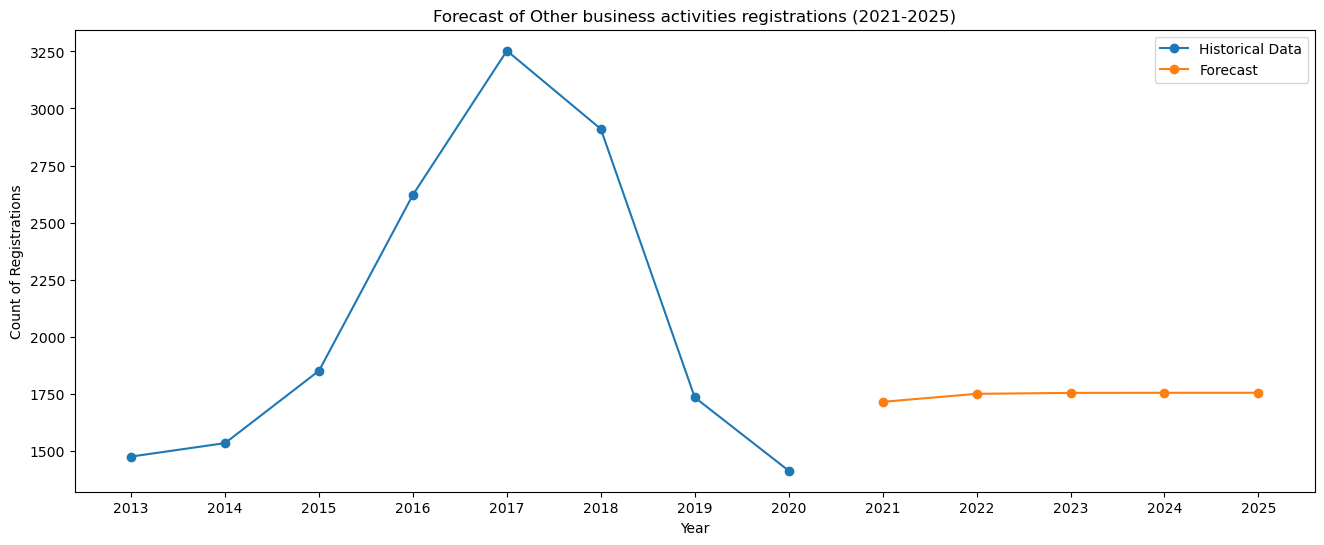

Forecasted registrations for Other business activities for 2021-2025:
2021-01-01    1714.778071
2022-01-01    1749.865209
2023-01-01    1753.944720
2024-01-01    1754.419037
2025-01-01    1754.474185
Freq: AS-JAN, Name: predicted_mean, dtype: float64


C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible start

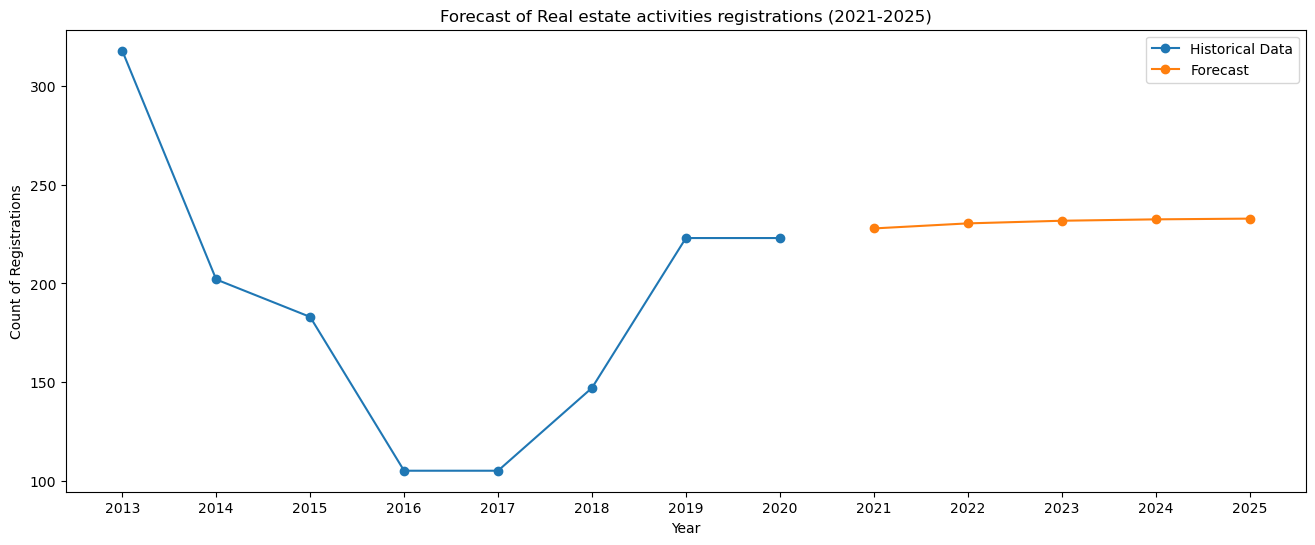

Forecasted registrations for Real estate activities for 2021-2025:
2021-01-01    227.874034
2022-01-01    230.432530
2023-01-01    231.775545
2024-01-01    232.480525
2025-01-01    232.850586
Freq: AS-JAN, Name: predicted_mean, dtype: float64


C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible start

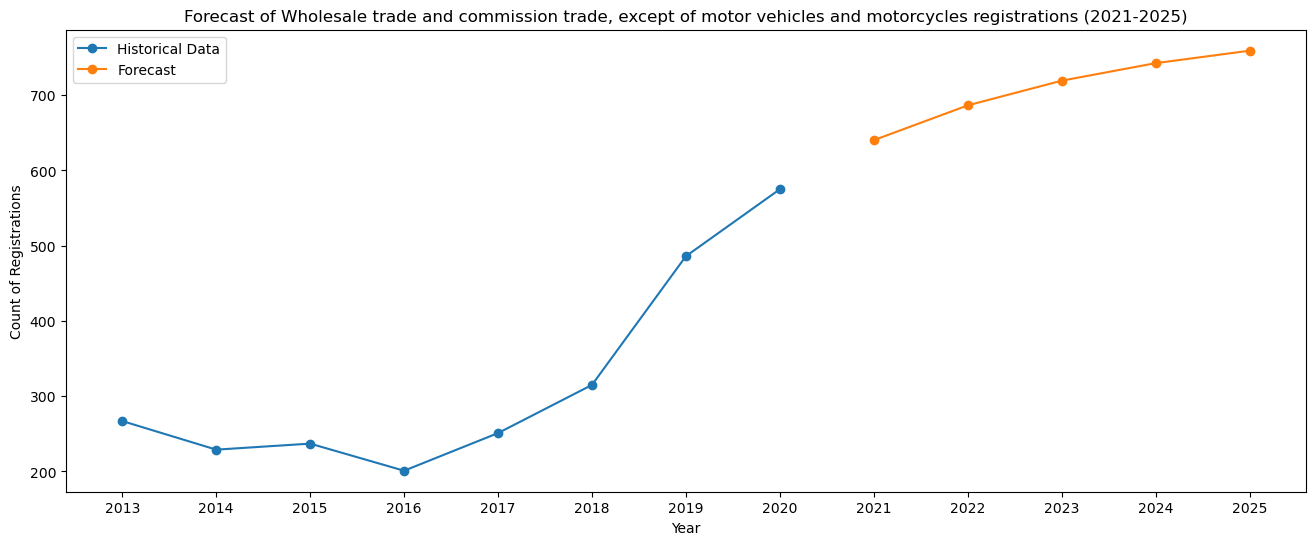

Forecasted registrations for Wholesale trade and commission trade, except of motor vehicles and motorcycles for 2021-2025:
2021-01-01    640.162348
2022-01-01    686.402716
2023-01-01    719.215709
2024-01-01    742.500396
2025-01-01    759.023626
Freq: AS-JAN, Name: predicted_mean, dtype: float64


C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible start

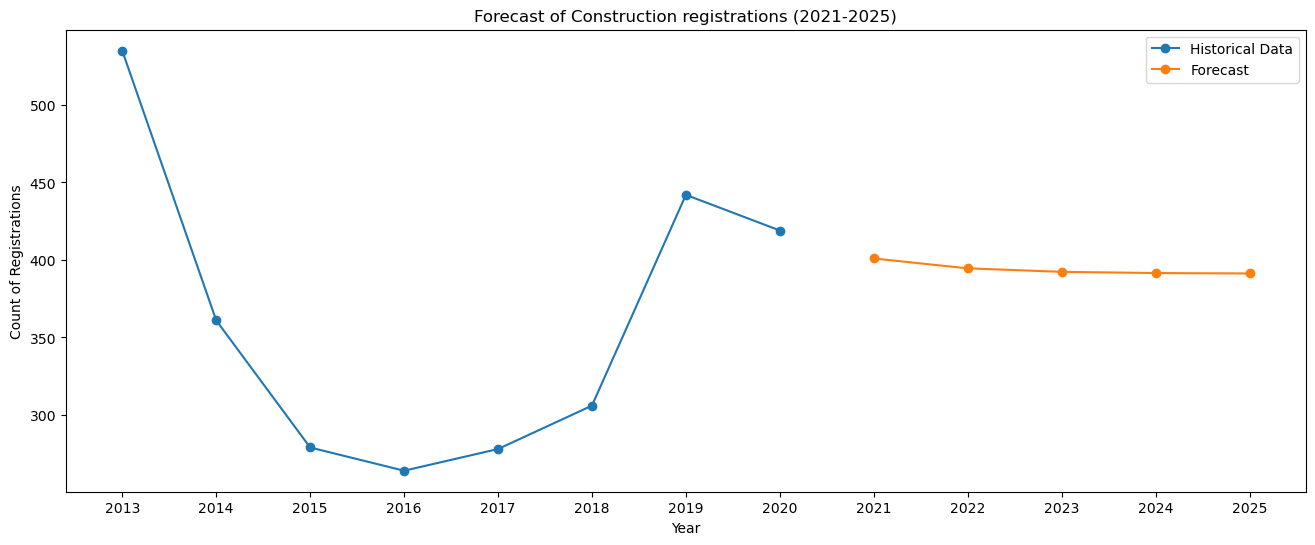

Forecasted registrations for Construction for 2021-2025:
2021-01-01    400.948083
2022-01-01    394.581617
2023-01-01    392.336322
2024-01-01    391.544462
2025-01-01    391.265192
Freq: AS-JAN, Name: predicted_mean, dtype: float64


C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


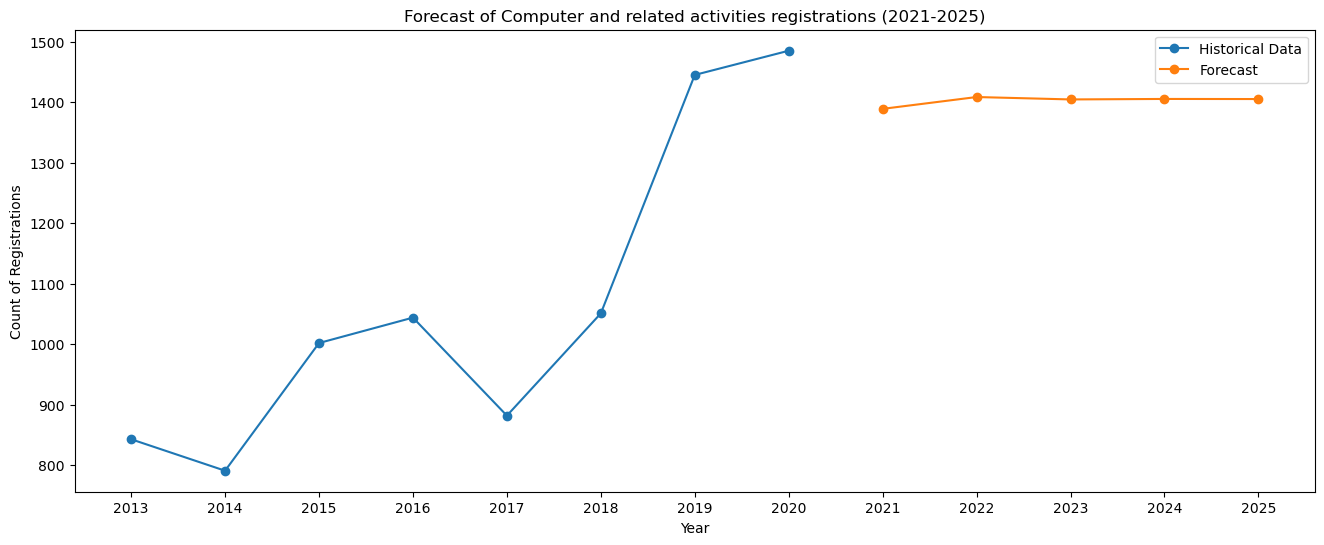

Forecasted registrations for Computer and related activities for 2021-2025:
2021-01-01    1388.935724
2022-01-01    1408.482718
2023-01-01    1404.505330
2024-01-01    1405.314642
2025-01-01    1405.149964
Freq: AS-JAN, Name: predicted_mean, dtype: float64


In [16]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'df' is your DataFrame
# Convert 'Latest_Year_AR' to datetime format
df['Latest_Year_AR'] = pd.to_datetime(df['Latest_Year_AR'], errors='coerce')

# Define the top 5 categories for forecasting
top_categories = [
    'Other business activities',
    'Computer and related activities',
    'Construction',
    'Agriculture, hunting and related service activities',
    'Financial intermediation'
]

# Loop through each category for forecasting
for category_to_forecast in top_categories:
    # Filter data for the specific category and the specified time range
    category_df = df[(df['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN'] == category_to_forecast) & 
                     (df['Registration_Year'] >= 2013) & (df['Registration_Year'] <= 2020)]

    # Extract relevant features and target variable
    X = category_df[['Registration_Year']]
    y = category_df.groupby('Registration_Year').size()

    # Convert 'Registration_Year' to DateTime format
    y.index = pd.to_datetime(y.index, format='%Y')

    # Fit ARIMA model
    model = ARIMA(y, order=(1, 1, 1))  # Adjust order as needed
    fit_model = model.fit()

    # Forecast registrations for the next 5 years (2021-2025)
    forecast_steps = 5
    forecast_values = fit_model.forecast(steps=forecast_steps)

    # Plot the forecast
    plt.figure(figsize=(16, 6))
    plt.plot(y.index.year, y.values, marker='o', label='Historical Data')
    plt.plot(range(y.index.year.max() + 1, y.index.year.max() + 1 + forecast_steps), forecast_values, marker='o', label='Forecast')
    plt.title(f'Forecast of {category_to_forecast} registrations (2021-2025)')
    plt.xticks(np.arange(2013, 2026, 1))
    plt.xlabel('Year')
    plt.ylabel('Count of Registrations')
    plt.legend()
    plt.show()

    # Display the forecasted values
    print(f"Forecasted registrations for {category_to_forecast} for 2021-2025:")
    print(forecast_values)